# Regularization in Linear Regression 

### Introduction 

Linear regression is very popular statistical model that is used to represent the relationship between some outcome variable $y_i$ and covariates (also known as features, explanatory variables, and independent variables) $x = (x_{1i}, x_{2i}, \ldots, x_{ki})$ using linear weights $\hat{\beta} = (\hat{\beta_{0}}, \hat{\beta_{1}}, \ldots, \hat{\beta_{k}}).$ The weights are choosen in a way such that the function $$f(x_{i};\hat{\beta}) = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1i} + \ldots + \hat{\beta_{k}}x_{ki},$$ for $i = 1, \ldots, n$ best fits the data. Note that $\beta$ is a unknown regression parameter, and $\hat{\beta}$ is its estimate from a learning algorithm. That is the model $f(x_{i};\hat{\beta})$ is estimating the following assumed true linear relationsthip between $y_{i}$ and $x_{i},$ $$y_{i} = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki} + \epsilon_{i},$$ where $\epsilon_{i}$ is a mean zero stochastic error term. The "linear" in linear regression means that the model is linear in the parameters, so $y_{i} = \beta_{0} + \beta_{1}x_{i}^2$ is a linear model, but $y_{i} = \beta_{0}x_{i}^{\beta_{1}}$ is nonlinear in parameters.

This function can be used to predict outcome $y_{i}$ given any covariates $x_{1i}, \ldots, x_{ki}.$ However a caveat for using linear regression with many covariates for prediction is that the model may "overfit" the data and may not be generalizable. Overfitting occurs when the model captures too much of the noise in the data which cannot generalize outside of sample. We will discuss a popular remedy to the overfitting problem, regularization. Intuitively speaking, regularlization is a method of changing the standard definition of a model "best fitting" the data in a way that its predictions are more generalizable to new data sets.

### Overfitting in linear Regression 

Overfitting is often a result of the model having too many parameters relative to the training data. Suppose we want to model the relationship between a outcome $y$ and covariate $x$ using $n$ data points. In this case, a $n-1$ degree polynomial in $x$ will perfectly fit the relationship between $y$ and $x$.

### Measuring fitness of Linear Model

Given our linear regression model $f(x_{i};\beta)$ and the outcome data $y_{i}$ we need to define a error function $Error(\beta).$ The most commonly used error function for the linear regression model is the square loss function, $$Error(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2,$$ where $f(x_{i};\beta) = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki}$ is a linear regression model. The smaller $Error(\beta)$ is, the better $f(x_{i};\beta)$ fits the data. Therefore $\beta$ is estimated for a linear regression model such that it minimizes $Error(\beta),$ that is $$\hat{\beta} = \text{argmin}_{\beta} \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2.$$ Therefore our learning algorithm for estimating $\beta$ is to minimize some known loss function, this will give us our estimated linear regression model $f(x_{i}, \hat{\beta}).$

### L1 and L2 Regularization Models 

Suppose we are trying to model the relationship between $y_{i}$ and $x_{i}$ using a high degree polynomial (10 degrees for example). If we minimize $Error(\beta)$ above (square loss) to estimate our model, then this model is prone to overfitting if the higher order terms are assigned large weights to caputure noise in the data. The simple idea behind regularization is that we add a penalty function to the standard square loss function so that learning algorithm doesn't easily assign large weights to the higher order covariates. The $L1$ regularized error function is $$Error_{L1}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,$$ and the $L2$ regualirized error function is $$Error_{L2}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2},$$ where $\lambda$ is the regularization parameter. Note that using the $L1$ loss function is known as lasso regression, and using the $L2$ loss function is known as ridge regression. The regularized terms $\frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,\frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2}$ in the $L1$ and $L2$ loss functions respectively shrink the parameters $(\beta_{1}, \ldots, \beta_{k})$ towards 0 (notice the intercept $\beta_{0}$ is excluded from the regularized term). Suppose the true relationship between $y_{i}$ and $x_{i}$ is quadratic, then regularization should prevent our 10 degree polynomial from overfitting as now the higher degree terms will likely be assigned lower weight than if we had used the standard sqaure loss $Error(\beta).$ The tuning parameter $\lambda$ is usually determined by using a methadology known as cross validation. We will leave cross validation for a future notebook, for now we will just set $\lambda = 5.$

### Applying regularization to IMDB movie data 

We will use it estimate the parameters in a multiple linear regression framework to flexibly model the relationship between IMDB's movies score (rating out of 10) and the movies gross sales (in dollars). We will use a data set from https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset. The data contains various statistics from IMDB for over 5000 movies. For our purposes we will only be interested in the IMDB rating and gross sales revenue.

###### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### Loading Data 

In [2]:
movie_data = pd.read_csv("movie_metadata.csv")
# movie_data.shape
movie_data.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [3]:
movie_data.shape

(5043, 28)

##### Cleaning the Data 

Let's clean the data set a little bit. We will only keep the US movies since some of the gross revenues for movies from other countries are not reported in dollars. We will also only keep the imdb score and gross revenue variables for our analysis and drop the rest. I also informally convert the movie gross sales revenue in terms of 2017 dollar by assuming a $2.5\%$ yearly inflation rate. (To formally convert to 2017 dollars we would need to use consumer price index data from the US bureau of labour statistics) Also since we are dealing with real data, we need to take missing values into consideration. Finally, for the purposes of illustrating overfitting on a scatter plot, we will be randomly dropping $90\%$ of the data (this is ofcourse not recommended in practice).

In [4]:
# Dropping rows where gross revenue data is not available
movie_data = movie_data.dropna(subset=['gross'])

# Taking movies only from US
movie_data = movie_data[movie_data['country'] == 'USA']

# Assuming average inflation rate of USA economy by 2.5%, converting gross revenue in terms of 2017 economy
movie_data['gross'] = (1.025 ** (2017 - movie_data['title_year']))*movie_data['gross']

# Only keeping the parameters we are interested in
movie_data = movie_data[['gross', 'imdb_score']]

# Scaling gross so its easier to read
movie_data['gross'] = movie_data['gross']/1000000

# Now, randomly dropping 90% of data, we don't do that in real test condition, but since this is for demonstrataing
# Regularization, we need to do this to overfit the data.

# Seeding the random function so that it always generates the same set of random numbers
np.random.seed(1)

movie_data['uniform_dist'] = list(np.random.uniform(0,1, len(movie_data.index)))

# only keeping 10% of data
movie_data = movie_data[movie_data['uniform_dist'] < 0.1]

#Now, dropping that uniform_dist parameter
movie_data = movie_data[['gross', 'imdb_score']]

movie_data.describe()

gross  imdb_score
count  309.000000  309.000000
mean    77.310864    6.444337
std     97.368754    1.076766
min      0.001458    1.900000
25%     12.371142    5.900000
50%     44.115456    6.500000
75%    106.037599    7.200000
max    589.385124    9.200000

From the above stats, we have a data of 309 different movies, having an average sales revenue of 77.3 million dollars and an average IMDB rating of 6.4.

##### Visualize our data 

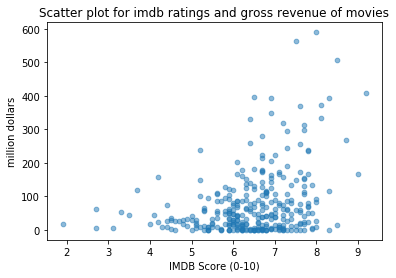

In [5]:
plt.scatter(movie_data['imdb_score'], movie_data['gross'], s=22, alpha=0.5)
plt.xlabel('IMDB Score (0-10)')
plt.ylabel('million dollars')
plt.title('Scatter plot for imdb ratings and gross revenue of movies')
plt.show()

### Estimating linear Model parameters 

Optimization algorithms such as gradient descent or newton's method can be used to minimize a given loss function and estimate the parameters in our linear model. However since the main purpose of this notebook is to illustrate regularization methods, for code simplicity we will use well known closed form solutions to implement standard linear regression and $L2$ regularization. Using matrices, we can re-write the assumed true linear relationship between $y_{i}$ and $x_{i}$ as

$$\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix} 
=
\begin{bmatrix}
    1 &amp; x_{11} &amp; \ldots &amp; x_{k1}\\
    \vdots &amp; \vdots &amp; \ldots &amp; \vdots \\
    1 &amp; x_{12} &amp; \ldots &amp; x_{k2}\\
    1 &amp; x_{1n} &amp; \ldots &amp; x_{kn}
\end{bmatrix} 
\begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \vdots \\
    \beta_{k}
\end{bmatrix} 
+
\begin{bmatrix}
    \epsilon_{1} \\
    \epsilon_{2} \\
    \vdots \\
    \epsilon_{n}
\end{bmatrix}.
$$
Using outcome vector $y$, coeffecient vector $\beta$, error vector $\epsilon$, and covariate matrix $X$ (also known as design matrix), we can re-write the above equation as $y = X\beta + \epsilon.$ For the standard square loss function, the closed form solution for the parameters is $\hat{\beta} = (X'X)^{-1}X'y,$ and for the $L2$ regularized loss function the closed form solution is $\hat{\beta} = (X'X + \lambda I)^{-1}X'y,$ where I = $
\begin{bmatrix}
    0 &amp; 0 &amp; \ldots &amp; 0\\
    0 &amp; 1 &amp; \ldots &amp; 0\\
    0 &amp; 0 &amp; 1 &amp; 0 \\
    \vdots &amp; \vdots &amp; \ldots &amp; \vdots \\
    0 &amp; 0 &amp; \ldots &amp; 1
\end{bmatrix}. 
$ Note that the $L1$ regularized loss function doesn't have a closed form solution for the parameters so we have to use numerical methods to implement it. We will not be implementing the $L1$ regularized method here since the result will likely be similar to $L2$ for our small data set. 

### Deriving the closed form solutions

It's actually intuitive to formulate the closed form solutions showed for the standard linear and ridge regression. For ridge regression, the matrix representation of the $L2$ loss function is $$Error_{L2}(\beta) = \frac{1}{2}(f(x;\beta) - y)'(f(x;\beta) - y)+\frac{\lambda}{2}\beta'\beta,$$ where $y$ is outcome vector, $f(x,\beta) = X\beta$ is vector of linear model predictions, and $\beta$ is parameter vector. To estimate $\beta$, we minimize $Error_{L2}(\beta)$ and hence compute $\frac{d Error_{L2}(\beta)}{d\beta} = 0.$ After differentiation $Error_{L2}(\beta)$ with respect to $\beta$ we can obtain $$X'X\beta-X'y+\lambda I\beta = 0,$$ and rearranging the above equation results in $\hat{\beta} = (X'X + \lambda I)^{-1}X'y$, the closed form solution for ridge regression. The closed form solution for the standard linear regression with square loss can be derived in a similar manner.

In [6]:
def cal_beta(X, y, Lambda):
    xt = np.matrix.transpose(X)
    I = np.identity(len(X[1, :]))
    I[0,0] = 0 # We dont regularize the first member
    
    beta = np.dot(np.linalg.inv(np.add(np.dot(xt,X), Lambda*I)), np.dot(xt, y))
    return beta

In [7]:
# Estimate a one degree linear regression model (using standard square loss function)
# Simple linear regression is y = B0 + B1*x

result = np.array(movie_data['gross'])
imdb_score = np.array(movie_data['imdb_score'])

ones = np.ones(len(result))

# The 'x' [design] matrix
design_matrix = np.column_stack((ones, imdb_score))

beta_linear = cal_beta(design_matrix, result, 0)

print( beta_linear)


[-117.29670069   30.1982311 ]


In [8]:
# Estimate a five degree linear regression model (using standard square loss function)
# Mutiple linear regression is y = B0 + B1*x + B2*x^2 + ... + B5*x^5

imdb_score2 = np.power(imdb_score, 2)
imdb_score3 = np.power(imdb_score, 3)
imdb_score4 = np.power(imdb_score, 4)
imdb_score5 = np.power(imdb_score, 5)

design_matrix_multiple = np.column_stack((ones, imdb_score, imdb_score2, imdb_score3, imdb_score4, imdb_score5))

beta_multi = cal_beta(design_matrix_multiple, result, 0) # Still no regularization

print(beta_multi)

[ -6.11000080e+02   7.19106314e+02  -3.00110405e+02   5.95975240e+01
  -5.71082960e+00   2.16394634e-01]


In [24]:
# Now, with L2 regularization

beta_reg = cal_beta(design_matrix_multiple, result, 5)
print(beta_reg)

[  3.58453736e+01  -1.34096261e+00  -4.46584136e+00   2.65252249e+00
  -4.97823169e-01   3.33680879e-02]


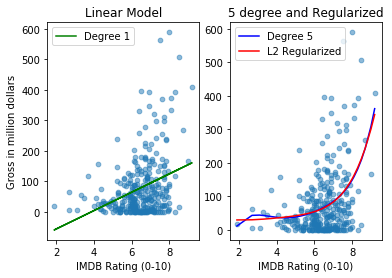

In [33]:
# Now, Visualizing the outcome

plt.subplot(1,2,1)
plt.scatter(movie_data['imdb_score'], movie_data['gross'], s=22, alpha=0.5)

plt.title("Linear Model")
plt.ylabel("Gross in million dollars")
plt.xlabel("IMDB Rating (0-10)")

simple, = plt.plot(imdb_score, beta_linear[0] + imdb_score*beta_linear[1], 'g')
plt.legend([simple], ['Degree 1'])

plt.subplot(1,2,2)
plt.scatter(movie_data['imdb_score'], movie_data['gross'], s=22, alpha=0.5)

plt.title("5 degree and Regularized")
plt.xlabel("IMDB Rating (0-10)")

multiple, = plt.plot(np.sort(imdb_score), beta_multi[0] + np.sort(imdb_score)*beta_multi[1] + 
                      np.sort(imdb_score2)*beta_multi[2] + np.sort(imdb_score3)*beta_multi[3] + 
                      np.sort(imdb_score4)*beta_multi[4] + np.sort(imdb_score5)*beta_multi[5], 'b')

ridge, = plt.plot(np.sort(imdb_score), beta_reg[0] + np.sort(imdb_score)*beta_reg[1] + 
                      np.sort(imdb_score2)*beta_reg[2] + np.sort(imdb_score3)*beta_reg[3] + 
                      np.sort(imdb_score4)*beta_reg[4] + np.sort(imdb_score5)*beta_reg[5], 'r')

plt.legend([multiple, ridge], ["Degree 5", "L2 Regularized"])

plt.show()